# Effect of scaling $\alpha$

In this notebook, we will discuss the impact of scaling of the top layer, which will determine the distance from initialzation to the solution

## Preparation

Here we use MNIST dataset and batch_size = 128, the number of hidden neurons is $m=10^4$.

In [2]:
import torch
from torch import optim, nn
from torchvision import datasets, transforms
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
import random
from models import train, train_2
# training parameters
batch_size = 128

transform = transforms.Compose([
        transforms.ToTensor()
])
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data', train=True, download=True, transform=transform),
    batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data', train=False, download=True, transform=transform),
    batch_size=batch_size, shuffle=True)

h_dim = 10000
train_epoch = 50
alpha_set = [h_dim**(0.1*k) for k in range(11)]

## Different $\alpha$
We set $\alpha = m^t$, where $t=0,0.3,0.5,1$ and compare the dynamics of NN parameters.

Note that there are two types of learning rate ratio are analysed in the theory which justify the behavior of NN with different $\alpha$: 

(1) $\eta_u/\eta_\theta=1$ as Fig.2 in the paper; 

(2) $\eta_u/\eta_\theta=\alpha$.



### $\eta_u/\eta_\theta=1$

In [ ]:
alpha = alpha_set[0]
r1,a1,l1 = train(train_loader,test_loader,h_dim,alpha,train_epoch,.1)

In [ ]:
alpha = alpha_set[3]
r2,a2,l2 = train(train_loader,test_loader,h_dim,alpha,train_epoch,.1)

In [ ]:
alpha = alpha_set[5]
r3,a3,l3 = train(train_loader,test_loader,h_dim,alpha,train_epoch,.1)

In [ ]:
alpha = alpha_set[7]
r4,a4,l4 = train(train_loader,test_loader,h_dim,alpha,train_epoch,.1)

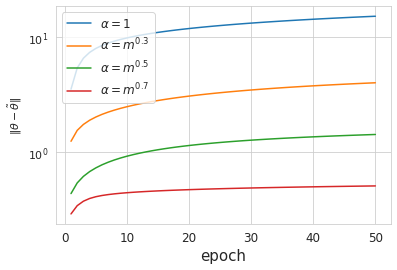

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")



plt.plot(np.arange(50)+1,np.array(r1)[:,0],label = r'$\alpha = 1$')
plt.plot(np.arange(50)+1,np.array(r2)[:,0],label = r'$\alpha = {m}^{0.3}$')
plt.plot(np.arange(50)+1,np.array(r3)[:,0],label = r'$\alpha = {m}^{0.5}$')
plt.plot(np.arange(50)+1,np.array(r4)[:,0],label = r'$\alpha = m^{0.7}$')

plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=11)

plt.ylabel(r'${\Vert \theta-\tilde{\theta} \Vert}$',fontsize=11)
plt.xlabel('epoch',fontsize=15)
#plt.ylim([0.1,10])
plt.yscale('log')

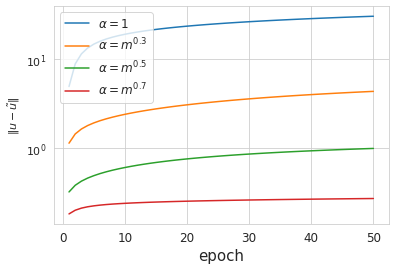

In [7]:
plt.plot(np.arange(50)+1,np.array(r1)[:,1],label = r'$\alpha = 1$')
plt.plot(np.arange(50)+1,np.array(r2)[:,1],label = r'$\alpha = {m}^{0.3}$')
plt.plot(np.arange(50)+1,np.array(r3)[:,1],label = r'$\alpha = {m}^{0.5}$')
plt.plot(np.arange(50)+1,np.array(r4)[:,1],label = r'$\alpha = m^{0.7}$')

plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=11)

plt.ylabel(r'${\Vert u- \tilde{u} \Vert}$',fontsize=11)
plt.xlabel('epoch',fontsize=15)
plt.yscale('log')

### $\eta_u/\eta_\theta=\alpha$

In [8]:
train_epoch = 100
alpha = alpha_set[0]
r1_,a1_,l1_ = train_2(train_loader,test_loader,h_dim,alpha,train_epoch,.1)
alpha = alpha_set[3]
r2_,a2_,l2_ = train_2(train_loader,test_loader,h_dim,alpha,train_epoch,.1)
alpha = alpha_set[5]
r3_,a3_,l3_ = train_2(train_loader,test_loader,h_dim,alpha,train_epoch,.1)

epoch 0 loss (train,test):1.33e+00;1.32e+00 acc:0.815000
dtheta: 3.5486195
du: 4.94465446472168
epoch 1 loss (train,test):8.29e-01;8.16e-01 acc:0.877800
dtheta: 5.4245253
du: 8.882773399353027
epoch 2 loss (train,test):6.01e-01;5.88e-01 acc:0.900700
dtheta: 6.5978117
du: 11.524886131286621
epoch 3 loss (train,test):4.83e-01;4.74e-01 acc:0.909200
dtheta: 7.412442
du: 13.407532691955566
epoch 4 loss (train,test):4.11e-01;4.09e-01 acc:0.915800
dtheta: 8.026389
du: 14.838394165039062
epoch 5 loss (train,test):3.48e-01;3.66e-01 acc:0.920300
dtheta: 8.519627
du: 15.987896919250488
epoch 6 loss (train,test):3.16e-01;3.38e-01 acc:0.924400
dtheta: 8.9339
du: 16.947755813598633
epoch 7 loss (train,test):3.10e-01;3.11e-01 acc:0.926800
dtheta: 9.293246
du: 17.77446937561035
epoch 8 loss (train,test):2.92e-01;2.95e-01 acc:0.930300
dtheta: 9.613325
du: 18.50379753112793
epoch 9 loss (train,test):2.89e-01;2.83e-01 acc:0.931200
dtheta: 9.901876
du: 19.157129287719727
epoch 10 loss (train,test):2.70e-0

epoch 84 loss (train,test):7.88e-02;1.44e-01 acc:0.955300
dtheta: 17.615814
du: 35.31831741333008
epoch 85 loss (train,test):1.00e-01;1.43e-01 acc:0.955700
dtheta: 17.66993
du: 35.42942428588867
epoch 86 loss (train,test):7.24e-02;1.45e-01 acc:0.955800
dtheta: 17.724165
du: 35.53936004638672
epoch 87 loss (train,test):6.91e-02;1.43e-01 acc:0.955700
dtheta: 17.777178
du: 35.64850616455078
epoch 88 loss (train,test):6.50e-02;1.43e-01 acc:0.955600
dtheta: 17.829975
du: 35.756675720214844
epoch 89 loss (train,test):8.16e-02;1.46e-01 acc:0.955800
dtheta: 17.882263
du: 35.863800048828125
epoch 90 loss (train,test):9.17e-02;1.43e-01 acc:0.956200
dtheta: 17.934275
du: 35.96997833251953
epoch 91 loss (train,test):6.98e-02;1.42e-01 acc:0.955700
dtheta: 17.98597
du: 36.07529830932617
epoch 92 loss (train,test):7.52e-02;1.42e-01 acc:0.955600
dtheta: 18.036936
du: 36.17959976196289
epoch 93 loss (train,test):8.09e-02;1.43e-01 acc:0.956100
dtheta: 18.08717
du: 36.28306579589844
epoch 94 loss (train,

epoch 67 loss (train,test):3.20e-02;1.08e-01 acc:0.967300
dtheta: 14.878322
du: 0.5646149876107728
epoch 68 loss (train,test):3.66e-02;1.12e-01 acc:0.966900
dtheta: 14.927686
du: 0.569917834318785
epoch 69 loss (train,test):3.84e-02;1.08e-01 acc:0.967100
dtheta: 14.976528
du: 0.5751828925200667
epoch 70 loss (train,test):3.89e-02;1.08e-01 acc:0.967400
dtheta: 15.024652
du: 0.5804078756489243
epoch 71 loss (train,test):4.73e-02;1.08e-01 acc:0.967200
dtheta: 15.072106
du: 0.5855901361029751
epoch 72 loss (train,test):3.97e-02;1.08e-01 acc:0.967300
dtheta: 15.1191845
du: 0.5907364734065194
epoch 73 loss (train,test):3.74e-02;1.08e-01 acc:0.967700
dtheta: 15.165932
du: 0.5958441797843934
epoch 74 loss (train,test):3.64e-02;1.09e-01 acc:0.967700
dtheta: 15.211826
du: 0.6009097050424935
epoch 75 loss (train,test):3.75e-02;1.09e-01 acc:0.967600
dtheta: 15.257262
du: 0.6059399088779014
epoch 76 loss (train,test):3.41e-02;1.08e-01 acc:0.967500
dtheta: 15.302072
du: 0.6109299774681035
epoch 77 l

epoch 49 loss (train,test):3.44e-03;6.22e-02 acc:0.980000
dtheta: 11.246917
du: 0.004962139129638672
epoch 50 loss (train,test):2.92e-03;6.47e-02 acc:0.980000
dtheta: 11.25616
du: 0.004995069205760956
epoch 51 loss (train,test):5.65e-03;6.75e-02 acc:0.980200
dtheta: 11.265172
du: 0.0050265234708786015
epoch 52 loss (train,test):2.50e-03;6.31e-02 acc:0.980100
dtheta: 11.274199
du: 0.005059080123901367
epoch 53 loss (train,test):2.35e-03;6.22e-02 acc:0.979800
dtheta: 11.283106
du: 0.005090599656105041
epoch 54 loss (train,test):2.84e-03;6.23e-02 acc:0.980000
dtheta: 11.291843
du: 0.0051214641332626345
epoch 55 loss (train,test):2.88e-03;6.25e-02 acc:0.980000
dtheta: 11.300527
du: 0.005153592228889465
epoch 56 loss (train,test):2.60e-03;6.24e-02 acc:0.980100
dtheta: 11.309078
du: 0.005184264183044434
epoch 57 loss (train,test):2.63e-03;6.26e-02 acc:0.980100
dtheta: 11.317583
du: 0.0052160173654556274
epoch 58 loss (train,test):3.01e-03;6.57e-02 acc:0.980200
dtheta: 11.325944
du: 0.0052467

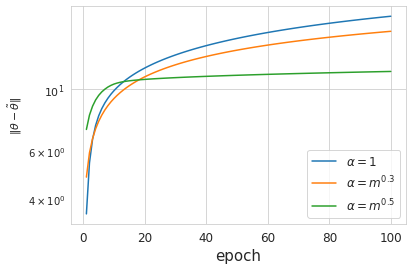

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")



plt.plot(np.arange(train_epoch)+1,np.array(r1_)[:,0],label = r'$\alpha = 1$')
plt.plot(np.arange(train_epoch)+1,np.array(r2_)[:,0],label = r'$\alpha = {m}^{0.3}$')
plt.plot(np.arange(train_epoch)+1,np.array(r3_)[:,0],label = r'$\alpha = {m}^{0.5}$')

plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=11)

plt.ylabel(r'${\Vert \theta-\tilde{\theta} \Vert}$',fontsize=11)
plt.xlabel('epoch',fontsize=15)
#plt.ylim([0.1,10])
plt.yscale('log')

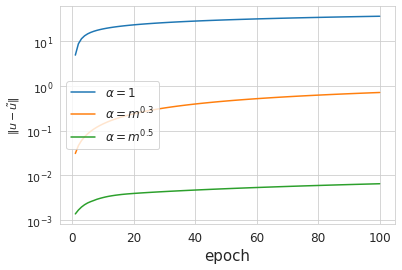

In [10]:
plt.plot(np.arange(train_epoch)+1,np.array(r1_)[:,1],label = r'$\alpha = 1$')
plt.plot(np.arange(train_epoch)+1,np.array(r2_)[:,1],label = r'$\alpha = {m}^{0.3}$')
plt.plot(np.arange(train_epoch)+1,np.array(r3_)[:,1],label = r'$\alpha = {m}^{0.5}$')

plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=11)

plt.ylabel(r'${\Vert u- \tilde{u} \Vert}$',fontsize=11)
plt.xlabel('epoch',fontsize=15)
plt.yscale('log')